In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit


#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

from bayes_opt import BayesianOptimization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)
from keras.layers import Dense, BatchNormalization, Dropout

In [2]:
df1 = pd.read_csv(r"C:\Users\Acer\Desktop\HDFC_Internship\DATA\Fraud_Data_Final.csv")

In [3]:
df1.shape

(73385, 9)

In [4]:
df1.size

660465

In [5]:
df1.head()

SERIAL NUMBER  TRANSACTION_ID             DATETIME  CUSTOMER_ID  \
0              0         1653444  2018-09-20 11:49:41            0   
1              1         1657926  2018-09-20 20:21:57            0   
2              2         1174679  2018-08-01 12:11:36            0   
3              3         1175894  2018-08-01 13:58:40            0   
4              4          758479   2018-06-19 4:18:11            0   

  TYPE of TRANSACTION  TRASCATION AMOUNT  TIME_SECONDS  \
0              Hotels              88.11      14903381   
1             Grocery              78.25      14934117   
2             Airways              62.28      10584696   
3             Airways              80.16      10591120   
4          Insulation              90.07       6841091   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  
0                           172      0  
1                           172      0  
2                           122      0  
3                           122      0  
4                            79      0

In [6]:
df1.tail()

SERIAL NUMBER  TRANSACTION_ID             DATETIME  CUSTOMER_ID  \
73380          38095          903947   2018-07-04 7:55:16         2015   
73381          38096          243562  2018-04-26 10:24:24         2015   
73382          38098          773468  2018-06-20 13:49:15         2015   
73383          38100         1177522  2018-08-01 16:44:45         2016   
73384          38101          948456  2018-07-08 17:53:44         2016   

      TYPE of TRANSACTION  TRASCATION AMOUNT  TIME_SECONDS  \
73380              Retail              63.03       8150116   
73381              Retail              45.23       2197464   
73382              Retail              31.59       6961755   
73383              Retail              27.61      10601085   
73384              Retail              11.41       8531624   

       DAYS_SINCE_FIRST_TRANSACTION  FRAUD  
73380                            94      0  
73381                            25      0  
73382                            80      0  
73383                           122      0  
73384                            98      0

In [7]:
df1.describe(include='all')

SERIAL NUMBER  TRANSACTION_ID             DATETIME   CUSTOMER_ID  \
count    73385.000000    7.338500e+04                73385  73385.000000   
unique            NaN             NaN                70904           NaN   
top               NaN             NaN  2018-04-05 13:03:35           NaN   
freq              NaN             NaN                    4           NaN   
mean     41048.878204    8.233976e+05                  NaN   2173.954514   
std      26492.483939    5.479239e+05                  NaN   1409.347516   
min          0.000000    6.295000e+03                  NaN      0.000000   
25%      18346.000000    4.632880e+05                  NaN    967.000000   
50%      36692.000000    7.594650e+05                  NaN   1941.000000   
75%      63533.000000    1.347494e+06                  NaN   3334.000000   
max      93756.000000    1.754143e+06                  NaN   4998.000000   

       TYPE of TRANSACTION  TRASCATION AMOUNT  TIME_SECONDS  \
count                73385       73385.000000  7.338500e+04   
unique                  10                NaN           NaN   
top             Insulation                NaN           NaN   
freq                  9512                NaN           NaN   
mean                   NaN          55.177761  7.419868e+06   
std                    NaN          43.472514  4.939476e+06   
min                    NaN           0.000000  5.153000e+04   
25%                    NaN          21.790000  4.177458e+06   
50%                    NaN          46.030000  6.850855e+06   
75%                    NaN          78.990000  1.214317e+07   
max                    NaN        1108.850000  1.581077e+07   

        DAYS_SINCE_FIRST_TRANSACTION         FRAUD  
count                   73385.000000  73385.000000  
unique                           NaN           NaN  
top                              NaN           NaN  
freq                             NaN           NaN  
mean                       85.383307      0.008939  
std                        57.169018      0.094124  
min                         0.000000      0.000000  
25%                        48.000000      0.000000  
50%                        79.000000      0.000000  
75%                       140.000000      0.000000  
max                       182.000000      1.000000

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73385 entries, 0 to 73384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SERIAL NUMBER                 73385 non-null  int64  
 1   TRANSACTION_ID                73385 non-null  int64  
 2   DATETIME                      73385 non-null  object 
 3   CUSTOMER_ID                   73385 non-null  int64  
 4   TYPE of TRANSACTION           73385 non-null  object 
 5   TRASCATION AMOUNT             73385 non-null  float64
 6   TIME_SECONDS                  73385 non-null  int64  
 7   DAYS_SINCE_FIRST_TRANSACTION  73385 non-null  int64  
 8   FRAUD                         73385 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.0+ MB


In [9]:
df1.isnull().sum()

SERIAL NUMBER                   0
TRANSACTION_ID                  0
DATETIME                        0
CUSTOMER_ID                     0
TYPE of TRANSACTION             0
TRASCATION AMOUNT               0
TIME_SECONDS                    0
DAYS_SINCE_FIRST_TRANSACTION    0
FRAUD                           0
dtype: int64

In [10]:
df1.dtypes.value_counts()

int64      6
object     2
float64    1
dtype: int64

In [11]:
df1 = df1.drop(["SERIAL NUMBER","TRANSACTION_ID"], axis = 1)

In [12]:
df1['FRAUD'].value_counts(normalize=True)

0    0.991061
1    0.008939
Name: FRAUD, dtype: float64

In [13]:
df1['TYPE of TRANSACTION'].value_counts().count()

10

In [14]:
df1['TYPE of TRANSACTION'].value_counts()

Insulation     9512
Food           9211
Electronics    7931
Clothing       7394
Grocery        7115
Retail         7000
Footwear       6621
Airways        6584
Hotels         6086
Rental Car     5931
Name: TYPE of TRANSACTION, dtype: int64

In [15]:
df1['TYPE of TRANSACTION'][df1["FRAUD"] == 1].value_counts()

Food           107
Insulation      91
Electronics     77
Retail          73
Airways         66
Hotels          65
Grocery         63
Footwear        51
Rental Car      42
Clothing        21
Name: TYPE of TRANSACTION, dtype: int64

In [16]:
df1['TYPE of TRANSACTION'][df1["FRAUD"] == 0].value_counts()

Insulation     9421
Food           9104
Electronics    7854
Clothing       7373
Grocery        7052
Retail         6927
Footwear       6570
Airways        6518
Hotels         6021
Rental Car     5889
Name: TYPE of TRANSACTION, dtype: int64

In [17]:
df1['CUSTOMER_ID'].value_counts().count()

3456

In [18]:
df1['CUSTOMER_ID'].value_counts()

1848    57
571     57
1157    57
98      56
1881    55
        ..
2288     1
2145     1
4917     1
2023     1
1896     1
Name: CUSTOMER_ID, Length: 3456, dtype: int64

In [19]:
df1['CUSTOMER_ID'][df1["FRAUD"] == 1].value_counts()

1692    5
613     5
701     5
1085    5
1743    5
       ..
1719    1
1708    1
1706    1
1693    1
1992    1
Name: CUSTOMER_ID, Length: 536, dtype: int64

In [20]:
df1['CUSTOMER_ID'][df1["FRAUD"] == 0].value_counts()

571     57
1848    57
1157    57
98      56
1881    55
        ..
2357     1
2288     1
2145     1
4917     1
1896     1
Name: CUSTOMER_ID, Length: 3455, dtype: int64

In [21]:
df1["TYPE of TRANSACTION"][df1["FRAUD"] == 1].value_counts(normalize=True)

Food           0.163110
Insulation     0.138720
Electronics    0.117378
Retail         0.111280
Airways        0.100610
Hotels         0.099085
Grocery        0.096037
Footwear       0.077744
Rental Car     0.064024
Clothing       0.032012
Name: TYPE of TRANSACTION, dtype: float64

In [22]:
df1["TYPE of TRANSACTION"][df1["FRAUD"] == 0].value_counts(normalize=True)

Insulation     0.129536
Food           0.125177
Electronics    0.107990
Clothing       0.101376
Grocery        0.096963
Retail         0.095244
Footwear       0.090335
Airways        0.089620
Hotels         0.082787
Rental Car     0.080972
Name: TYPE of TRANSACTION, dtype: float64

In [23]:
df1.head()

DATETIME  CUSTOMER_ID TYPE of TRANSACTION  TRASCATION AMOUNT  \
0  2018-09-20 11:49:41            0              Hotels              88.11   
1  2018-09-20 20:21:57            0             Grocery              78.25   
2  2018-08-01 12:11:36            0             Airways              62.28   
3  2018-08-01 13:58:40            0             Airways              80.16   
4   2018-06-19 4:18:11            0          Insulation              90.07   

   TIME_SECONDS  DAYS_SINCE_FIRST_TRANSACTION  FRAUD  
0      14903381                           172      0  
1      14934117                           172      0  
2      10584696                           122      0  
3      10591120                           122      0  
4       6841091                            79      0

In [24]:
classes=df1['FRAUD'].value_counts()
normal_share=round(classes[0]/df1['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df1['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.11, 0.89)

In [25]:
classes

0    72729
1      656
Name: FRAUD, dtype: int64

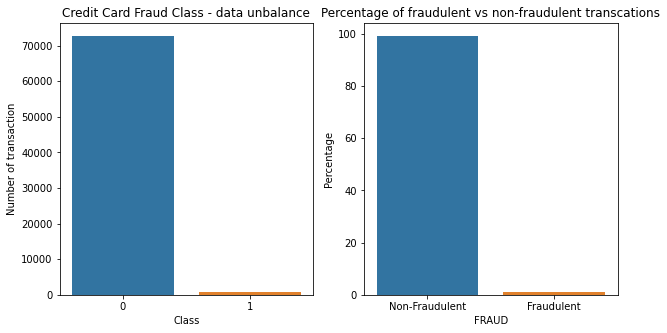

In [26]:
# bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = df1["FRAUD"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'FRAUD':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x=df_fraud_percentage['FRAUD'], y=df_fraud_percentage['Percentage'])
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

In [27]:
counts = df1['CUSTOMER_ID'][df1["FRAUD"] == 0].value_counts()

df= df1[    (df1['CUSTOMER_ID'].isin(counts[counts > 10].index)) | (df1["FRAUD"] == 1)   ]

# df = df1

In [28]:
classes=df['FRAUD'].value_counts()
normal_share=round(classes[0]/df['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.05, 0.95)

In [29]:
df["FRAUD"].value_counts()

0    68302
1      656
Name: FRAUD, dtype: int64

In [30]:
df1["FRAUD"].value_counts()

0    72729
1      656
Name: FRAUD, dtype: int64

In [31]:
# drop unnecessary columns
# df = df.drop("SERIAL NUMBER", axis = 1)
df = df.drop("TIME_SECONDS", axis = 1)

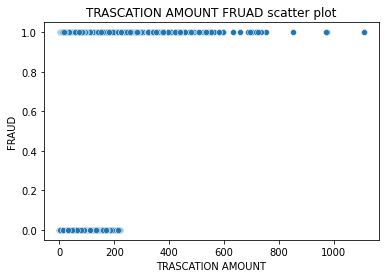

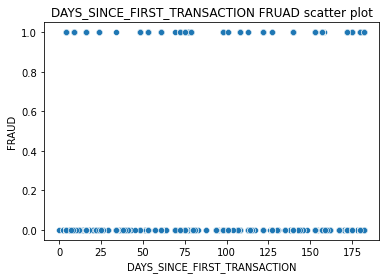

In [32]:
features = [ 'TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    sns.scatterplot(x = df[f], y = df["FRAUD"])
    title = f + " FRUAD scatter plot"
    plt.title(title)
    plt.show()
    

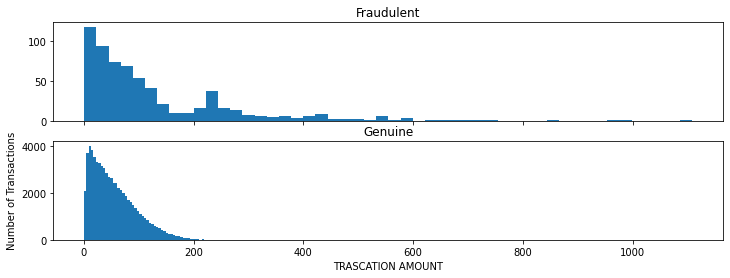

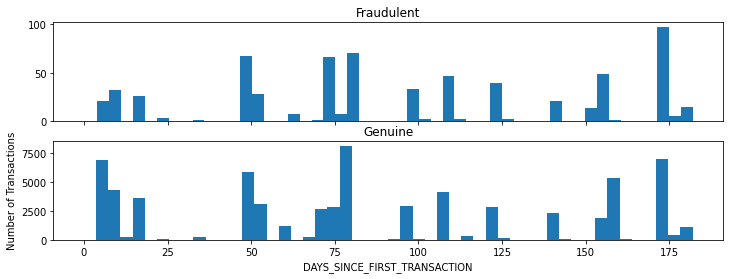

In [33]:
features = ['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

    ax1.hist(df[f][df["FRAUD"] == 1], bins = 50)
    ax1.set_title('Fraudulent')

    ax2.hist(df[f][df["FRAUD"] == 0], bins = 50)
    ax2.set_title('Genuine')

    plt.xlabel(f)
    plt.ylabel('Number of Transactions')
    plt.show()

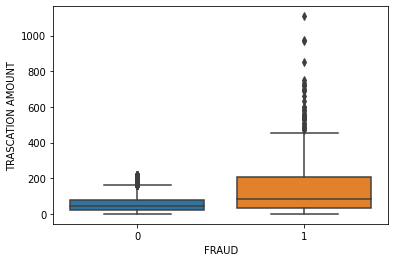

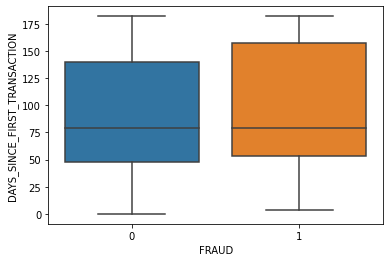

In [34]:
#Boxplot for the features, in order to visualiza the outliers.

features = ['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']
for f in features:
    sns.boxplot(x=df['FRAUD'], y=df[f])
    plt.show()
    

<Figure size 432x288 with 0 Axes>

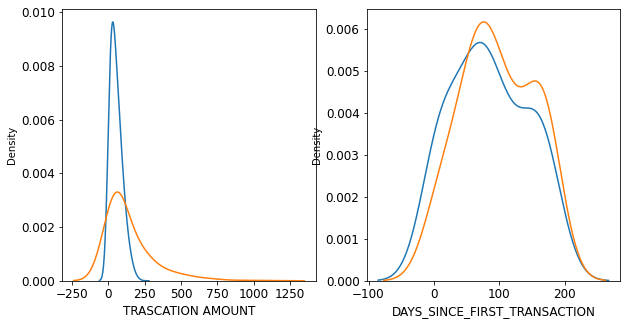

In [35]:
# Plotting all the variable in displot to visualise the distribution
var = ['TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']


i = 0
t0 = df.loc[df['FRAUD'] == 0]
t1 = df.loc[df['FRAUD'] == 1]

plt.figure()
fig, ax = plt.subplots(1,2,figsize=(10,5))

for feature in var:
    i += 1
    plt.subplot(1,2,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="0")
    sns.kdeplot(t1[feature], bw_method=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [36]:
# generate binary values using get_dummies
# features = ["TYPE of TRANSACTION","quarter","weekday_name","month_name"]
df_dum = pd.get_dummies(df, columns=["TYPE of TRANSACTION"],prefix='', prefix_sep='')

df_dum.head()

DATETIME  CUSTOMER_ID  TRASCATION AMOUNT  \
0  2018-09-20 11:49:41            0              88.11   
1  2018-09-20 20:21:57            0              78.25   
2  2018-08-01 12:11:36            0              62.28   
3  2018-08-01 13:58:40            0              80.16   
4   2018-06-19 4:18:11            0              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  Airways  Clothing  Electronics  Food  \
0                           172      0        0         0            0     0   
1                           172      0        0         0            0     0   
2                           122      0        1         0            0     0   
3                           122      0        1         0            0     0   
4                            79      0        0         0            0     0   

   Footwear  Grocery  Hotels  Insulation  Rental Car  Retail  
0         0        0       1           0           0       0  
1         0        1       0           0           0       0  
2         0        0       0           0           0       0  
3         0        0       0           0           0       0  
4         0        0       0           1           0       0

In [37]:
df.head()

DATETIME  CUSTOMER_ID TYPE of TRANSACTION  TRASCATION AMOUNT  \
0  2018-09-20 11:49:41            0              Hotels              88.11   
1  2018-09-20 20:21:57            0             Grocery              78.25   
2  2018-08-01 12:11:36            0             Airways              62.28   
3  2018-08-01 13:58:40            0             Airways              80.16   
4   2018-06-19 4:18:11            0          Insulation              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  
0                           172      0  
1                           172      0  
2                           122      0  
3                           122      0  
4                            79      0

<AxesSubplot:>

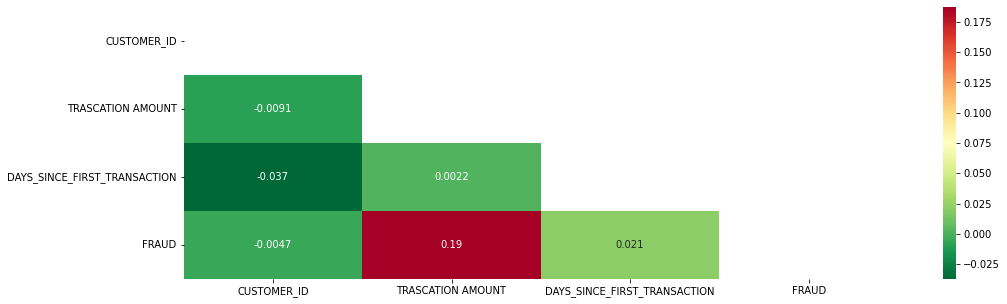

In [38]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap='RdYlGn_r',annot=True, mask=mask)

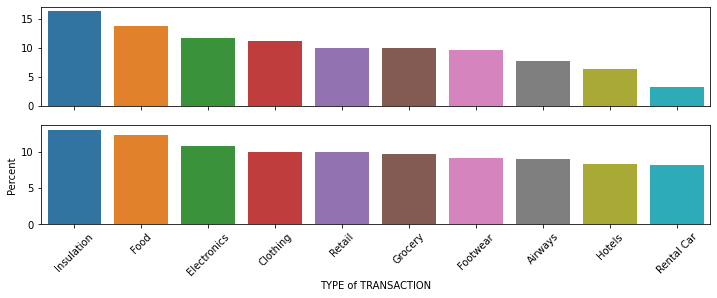

In [39]:
# features = ["TYPE of TRANSACTION", "month_name","quarter","time","weekday_name"]
features = ["TYPE of TRANSACTION"]
for f in features:
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
    
    Feature = df[f][df["FRAUD"] == 1].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 1].value_counts(normalize=True).values

    ax1 = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent',ax=ax1)

    Feature = df[f][df["FRAUD"] == 0].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 0].value_counts(normalize=True).values
    
    ax2 = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent',ax=ax2)
    
    
    ax2.set(ylabel=None)
    ax1.set(xlabel=None)
    ax1.set(ylabel=None)
    
    plt.xlabel(f)
    plt.ylabel("Percent")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

vif to check multicollinearity

In [40]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features 
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X = X.copy()
    X["intercept"] = 1

    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [41]:
# # features to consider removing
# considered_features = ["TYPE of TRANSACTION", "month", "quarter","dayofweek","time","weekday_name"]
considered_features = ['CUSTOMER_ID','TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
0                   CUSTOMER_ID  1.001457
2  DAYS_SINCE_FIRST_TRANSACTION  1.001379
1             TRASCATION AMOUNT  1.000086

Splitting the data into test and train

In [42]:
df = df_dum

In [302]:
df.head()

DATETIME  CUSTOMER_ID  TRASCATION AMOUNT  \
0  2018-09-20 11:49:41            0              88.11   
1  2018-09-20 20:21:57            0              78.25   
2  2018-08-01 12:11:36            0              62.28   
3  2018-08-01 13:58:40            0              80.16   
4   2018-06-19 4:18:11            0              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  Airways  Clothing  Electronics  Food  \
0                           172      0        0         0            0     0   
1                           172      0        0         0            0     0   
2                           122      0        1         0            0     0   
3                           122      0        1         0            0     0   
4                            79      0        0         0            0     0   

   Footwear  Grocery  Hotels  Insulation  Rental Car  Retail  
0         0        0       1           0           0       0  
1         0        1       0           0           0       0  
2         0        0       0           0           0       0  
3         0        0       0           0           0       0  
4         0        0       0           1           0       0

In [256]:
#drop date columns 
# df_dum = df_le.drop(["DATETIME","date","weekday_name"],axis=1)
df_dum = df_dum.drop(["DATETIME"],axis=1)

In [45]:
df_dum.head()

CUSTOMER_ID  TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  FRAUD  \
0            0              88.11                           172      0   
1            0              78.25                           172      0   
2            0              62.28                           122      0   
3            0              80.16                           122      0   
4            0              90.07                            79      0   

   Airways  Clothing  Electronics  Food  Footwear  Grocery  Hotels  \
0        0         0            0     0         0        0       1   
1        0         0            0     0         0        1       0   
2        1         0            0     0         0        0       0   
3        1         0            0     0         0        0       0   
4        0         0            0     0         0        0       0   

   Insulation  Rental Car  Retail  
0           0           0       0  
1           0           0       0  
2           0           0       0  
3           0           0       0  
4           1           0       0

In [44]:
y= df_dum["FRAUD"]
X = df_dum.drop("FRAUD", axis = 1)

In [45]:
X.head()

CUSTOMER_ID  TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  Airways  \
0            0              88.11                           172        0   
1            0              78.25                           172        0   
2            0              62.28                           122        1   
3            0              80.16                           122        1   
4            0              90.07                            79        0   

   Clothing  Electronics  Food  Footwear  Grocery  Hotels  Insulation  \
0         0            0     0         0        0       1           0   
1         0            0     0         0        1       0           0   
2         0            0     0         0        0       0           0   
3         0            0     0         0        0       0           0   
4         0            0     0         0        0       0           1   

   Rental Car  Retail  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# cols_to_norm = ['TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']

# scaler = MinMaxScaler()
# X[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])

In [47]:
# PCA or not
X_scaled = X

In [48]:
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [49]:
X_scaled_df.head()

CUSTOMER_ID  TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  Airways  \
0            0              88.11                           172        0   
1            0              78.25                           172        0   
2            0              62.28                           122        1   
3            0              80.16                           122        1   
4            0              90.07                            79        0   

   Clothing  Electronics  Food  Footwear  Grocery  Hotels  Insulation  \
0         0            0     0         0        0       1           0   
1         0            0     0         0        1       0           0   
2         0            0     0         0        0       0           0   
3         0            0     0         0        0       0           0   
4         0            0     0         0        0       0           1   

   Rental Car  Retail  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0

In [50]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state = 42, stratify=y)

In [51]:
y_train.value_counts(normalize=True)

0    0.990483
1    0.009517
Name: FRAUD, dtype: float64

In [52]:
X_train.head()

CUSTOMER_ID  TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  Airways  \
5118           402             101.42                            98        1   
45438         3137              95.96                           157        0   
12783          826              39.81                             4        0   
58993         4266              25.10                             9        0   
47908         3324              70.88                           108        0   

       Clothing  Electronics  Food  Footwear  Grocery  Hotels  Insulation  \
5118          0            0     0         0        0       0           0   
45438         0            0     0         0        1       0           0   
12783         1            0     0         0        0       0           0   
58993         0            0     0         1        0       0           0   
47908         0            1     0         0        0       0           0   

       Rental Car  Retail  
5118            0       0  
45438           0       0  
12783           0       0  
58993           0       0  
47908           0       0

# Model Building with Imbalance data

In [88]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [89]:
# ROC Curve function(receiver operating characteristic curve)
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

## 1.Logistic Regression

In [55]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]} # larger C - more prone to overfit
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(max_iter=1000),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.6928205019535153
Best hyperparameters:  {'C': 0.1}


In [56]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.110528      0.125058         0.017653        0.002099    0.01   
1       1.263373      0.168099         0.015777        0.003917     0.1   
2       1.015447      0.341223         0.014251        0.004338       1   
3       0.925082      0.304628         0.019834        0.008921      10   
4       0.961644      0.309646         0.012349        0.003290     100   
5       0.770012      0.177817         0.007220        0.004705    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.685435           0.676002           0.691434   
1   {'C': 0.1}           0.688118           0.679534           0.703030   
2     {'C': 1}           0.686331           0.680008           0.710203   
3    {'C': 10}           0.686246           0.682043           0.711040   
4   {'C': 100}           0.686265           0.682007           0.712236   
5  {'C': 1000}           0.686268           0.679625           0.711093   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.709376  ...         0.686814        0.013221                6   
1           0.712335  ...         0.692821        0.012817                1   
2           0.698345  ...         0.691049        0.011650                5   
3           0.698679  ...         0.691565        0.011720                3   
4           0.698689  ...         0.692660        0.011377                2   
5           0.698690  ...         0.691087        0.012173                4   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.692053            0.691259            0.686056   
1            0.704946            0.703138            0.695082   
2            0.700104            0.706866            0.698270   
3            0.700123            0.697788            0.698424   
4            0.700123            0.697798            0.689971   
5            0.700120            0.706999            0.698524   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.683163            0.692343          0.688975         0.003697  
1            0.693398            0.701910          0.699695         0.004588  
2            0.671671            0.705804          0.696543         0.012858  
3            0.671841            0.706046          0.694844         0.011866  
4            0.671853            0.704272          0.692803         0.011463  
5            0.671854            0.706084          0.696716         0.012857  

[6 rows x 21 columns]

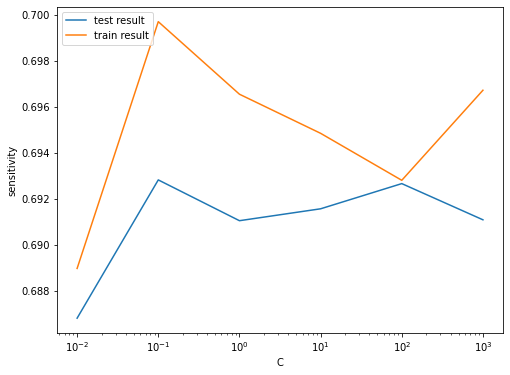

In [57]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [58]:
model_cv.best_params_

{'C': 0.1}

In [59]:
# Instantiating the model
log_reg_imb_model = LogisticRegression(C=1000,max_iter=1000)

# Fitting the model with train data
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=1000)

In [60]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [61]:

# Printing scores
display_scores(y_train, y_train_pred)

F1 Score: 17.39%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.10      0.17       525

    accuracy                           0.99     55166
   macro avg       1.00      0.55      0.58     55166
weighted avg       0.99      0.99      0.99     55166



In [62]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

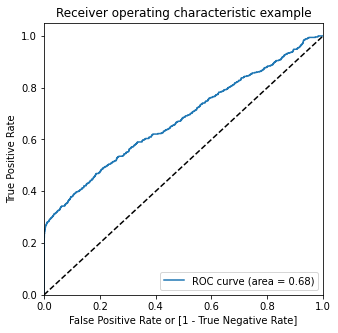

In [63]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [64]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 27.63%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       1.00      0.16      0.28       131

    accuracy                           0.99     13792
   macro avg       1.00      0.58      0.64     13792
weighted avg       0.99      0.99      0.99     13792



In [65]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

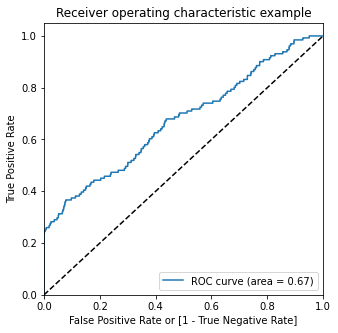

In [66]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 2. Decision Tree

In [67]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [68]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.149044      0.004656         0.010856        0.002506   
1       0.119296      0.018215         0.020243        0.008871   
2       0.139878      0.020229         0.022972        0.005323   
3       0.123081      0.001940         0.015202        0.000559   
4       0.183806      0.007047         0.011429        0.000946   
5       0.190491      0.011013         0.021416        0.005826   
6       0.179781      0.016370         0.014438        0.001620   
7       0.170833      0.008677         0.007632        0.003636   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.679781   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.679781   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.685060   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.685060   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.657829   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.657823   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.654472   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.654476   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.663359           0.685477         0.676206        0.009377   
1           0.663359           0.685477         0.676206        0.009377   
2           0.673723           0.682964         0.680582        0.004925   
3           0.673723           0.682964         0.680582        0.004925   
4           0.636160           0.686499         0.660163        0.020617   
5           0.636160           0.686395         0.660126        0.020573   
6           0.636753           0.658479         0.649901        0.009440   
7           0.637198           0.658479         0.650051        0.009234   

   rank_test_score  
0                3  
1                3  
2                1  
3                1  
4                5  
5                6  
6                8  
7                7

In [69]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.6805824424725927
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [70]:

# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [71]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 38.71%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.24      0.39       525

    accuracy                           0.99     55166
   macro avg       1.00      0.62      0.69     55166
weighted avg       0.99      0.99      0.99     55166



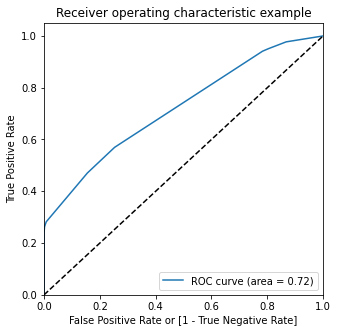

In [72]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [73]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)


F1 Score: 38.27%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       1.00      0.24      0.38       131

    accuracy                           0.99     13792
   macro avg       1.00      0.62      0.69     13792
weighted avg       0.99      0.99      0.99     13792



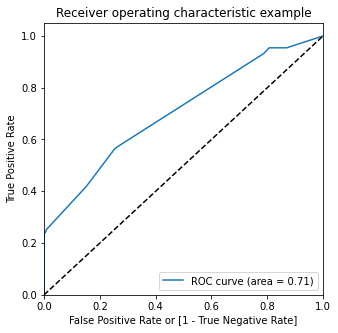

In [74]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 3. XGBoost

In [75]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [76]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.599656      0.070394         0.024421        0.003424   
1       2.303373      0.287437         0.033784        0.001832   
2       2.345543      0.098685         0.032282        0.002251   
3       2.094444      0.020319         0.031766        0.003404   
4       2.464541      0.201919         0.034563        0.001100   
5       2.548018      0.124276         0.033756        0.004829   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.689964   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.676940   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.688988   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.683941   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.677224   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.674862   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.660129           0.682200         0.677431        0.012638   
1           0.664023           0.692815         0.677926        0.011775   
2           0.669872           0.705832         0.688231        0.014691   
3           0.638065           0.675176         0.665727        0.019885   
4           0.688351           0.705754         0.690443        0.011741   
5           0.685784           0.707735         0.689461        0.013670   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.859916            0.848158   
1                4            0.867343            0.867903   
2                3            0.871225            0.874043   
3                6            0.874380            0.867049   
4                1            0.914870            0.914371   
5                2            0.926856            0.925648   

   split2_train_score  mean_train_score  std_train_score  
0            0.852102          0.853392         0.004886  
1            0.869932          0.868393         0.001112  
2            0.874045          0.873104         0.001329  
3            0.884594          0.875341         0.007195  
4            0.912442          0.913894         0.001047  
5            0.927866          0.926790         0.000907

In [77]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.6904429880759381
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [78]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [79]:
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[11:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [80]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 42.58%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.27      0.43       525

    accuracy                           0.99     55166
   macro avg       1.00      0.64      0.71     55166
weighted avg       0.99      0.99      0.99     55166



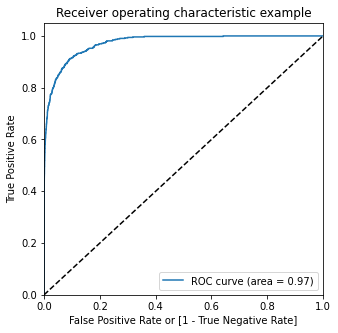

In [81]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [82]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 38.04%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       0.97      0.24      0.38       131

    accuracy                           0.99     13792
   macro avg       0.98      0.62      0.69     13792
weighted avg       0.99      0.99      0.99     13792



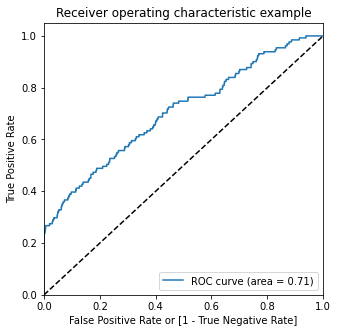

In [83]:
#### Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4. Random Forest Classifier

In [84]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [85]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.248884      0.127425         0.265204        0.013887   
1       3.238498      0.214999         0.270646        0.015538   
2       3.297300      0.185750         0.270495        0.015564   
3       3.210643      0.037834         0.273682        0.006132   
4       5.105251      0.324845         0.378234        0.012111   
5       4.936542      0.123190         0.366347        0.023578   
6       4.769132      0.237873         0.344684        0.014803   
7       4.365513      0.109838         0.264880        0.015322   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.691053   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.683751   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.679670   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.690687   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.679012   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.679309   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.682737   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.686887   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.690161           0.717278         0.699497        0.012578   
1           0.689737           0.726616         0.700035        0.018954   
2           0.692025           0.715949         0.695881        0.015060   
3           0.689404           0.712231         0.697441        0.010471   
4           0.679560           0.717829         0.692134        0.018170   
5           0.693478           0.723670         0.698819        0.018500   
6           0.687679           0.712206         0.694207        0.012886   
7           0.683535           0.713990         0.694804        0.013636   

   rank_test_score  
0                2  
1                1  
2                5  
3                4  
4                8  
5                3  
6                7  
7                6

In [86]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.7000348928719697
RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [87]:
# Printing best params
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [88]:
# Model with optimal hyperparameters
rf_imb_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [89]:
# Predictions on the train set

y_train_pred = rf_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 37.21%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.23      0.37       525

    accuracy                           0.99     55166
   macro avg       1.00      0.61      0.68     55166
weighted avg       0.99      0.99      0.99     55166



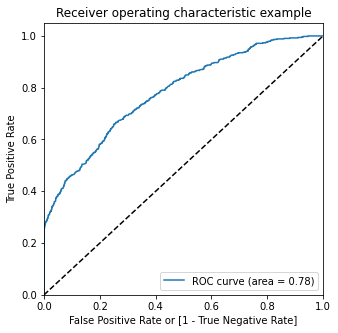

In [90]:
# Predicted probability
y_train_pred_proba_rf = rf_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba_rf)

In [91]:
# Predictions on the test set
y_test_pred = rf_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 38.27%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       1.00      0.24      0.38       131

    accuracy                           0.99     13792
   macro avg       1.00      0.62      0.69     13792
weighted avg       0.99      0.99      0.99     13792



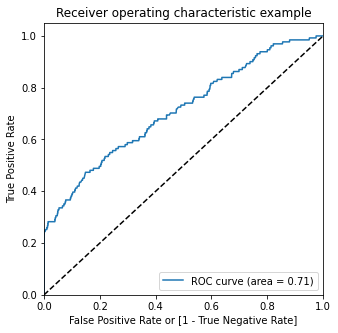

In [92]:
# Predicted probability
y_test_pred_proba = rf_imb_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# ANN

In [183]:
#function for confusion matrix
def conf_matrix(label,predicted_values):
    Predictions_CM = confusion_matrix(label, predicted_values, labels = [0, 1])
    class_feat=df['FRAUD'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {conf_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {conf_matrix(label, prediction)}\n") 

In [43]:
df_dum.head()

DATETIME  CUSTOMER_ID  TRASCATION AMOUNT  \
0  2018-09-20 11:49:41            0              88.11   
1  2018-09-20 20:21:57            0              78.25   
2  2018-08-01 12:11:36            0              62.28   
3  2018-08-01 13:58:40            0              80.16   
4   2018-06-19 4:18:11            0              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  Airways  Clothing  Electronics  Food  \
0                           172      0        0         0            0     0   
1                           172      0        0         0            0     0   
2                           122      0        1         0            0     0   
3                           122      0        1         0            0     0   
4                            79      0        0         0            0     0   

   Footwear  Grocery  Hotels  Insulation  Rental Car  Retail  
0         0        0       1           0           0       0  
1         0        1       0           0           0       0  
2         0        0       0           0           0       0  
3         0        0       0           0           0       0  
4         0        0       0           1           0       0

In [740]:
X.shape[1]

15

In [728]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [729]:
df['date'] = df['DATETIME'].dt.date

In [200]:
df_nn = (
                df
                .assign(hour = df['DATETIME'].dt.hour)
                .assign(day = df['DATETIME'].dt.day)
                .assign(month = df['DATETIME'].dt.month)
                .assign(day_of_week = df['DATETIME'].dt.dayofweek)
                .assign(week_of_year = df['DATETIME'].dt.isocalendar().week)
                .assign(date = df['DATETIME'].dt.date)
              )

In [201]:
def onehot_encode_pd(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1).drop(columns=col)
    
    return df

df_nn = onehot_encode_pd(df_nn, ['month','day_of_week'])


In [204]:
df_nn.columns

Index(['DATETIME', 'CUSTOMER_ID', 'TRASCATION AMOUNT',
       'DAYS_SINCE_FIRST_TRANSACTION', 'FRAUD', 'Airways', 'Clothing',
       'Electronics', 'Food', 'Footwear', 'Grocery', 'Hotels', 'Insulation',
       'Rental Car', 'Retail', 'date', 'hour', 'day', 'week_of_year',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6'],
      dtype='object')

In [212]:
df_nn = df_nn.drop("DATETIME",axis=1)

# Analytics Vidhya


In [213]:
scalar = StandardScaler()

X = df_nn.drop('FRAUD', axis=1)
y = df_nn.FRAUD

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42, stratify=y)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42, stratify=y_train_v)

X_train[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']]= scalar.fit_transform(X_train[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']])
X_validate[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']] = scalar.fit_transform(X_validate[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']])
X_test[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']] = scalar.fit_transform(X_test[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']])


w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.009503832608245288
Non-Fraudulant transaction weight: 0.9904961673917547


In [214]:
X_train.head()

CUSTOMER_ID  TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  Airways  \
29597    -0.167102          -0.580477                     -0.655139        0   
3540     -1.309910          -1.165720                     -1.219101        0   
67188    -1.422904           1.384731                      0.226053        0   
23409    -0.445295           0.030634                     -0.426029        0   
38849     0.352812           0.167129                     -0.426029        0   

       Clothing  Electronics  Food  Footwear  Grocery  Hotels  ...  month_7  \
29597         0            0     0         0        0       1  ...        0   
3540          0            0     0         0        0       0  ...        0   
67188         0            0     0         0        0       0  ...        1   
23409         0            0     0         0        0       0  ...        0   
38849         0            0     0         0        0       0  ...        0   

       month_8  month_9 day_of_week_0  day_of_week_1  day_of_week_2  \
29597        0        0             0              0              0   
3540         0        0             0              1              0   
67188        0        0             0              0              0   
23409        0        0             0              0              0   
38849        0        0             0              0              0   

       day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  
29597              0              0              1              0  
3540               0              0              0              0  
67188              0              0              0              1  
23409              0              1              0              0  
38849              0              1              0              0  

[5 rows x 30 columns]

In [78]:
input_dim = X_train.shape[1]
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=input_dim, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [79]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9926   |  5.51     |  335.3    |  0.4361   |  0.2308   |  43.63    |  1.298    |  1.045    |  0.426    |  31.48    |  0.3377   |  6.935    |
|  2        |  0.9907   |  2.14     |  265.0    |  0.6696   |  0.1864   |  41.94    |  1.932    |  1.237    |  0.08322  |  91.07    |  0.794    |  5.884    |
|  3        |  0.9905   |  7.337    |  992.8    |  0.5773   |  0.2441   |  53.71    |  1.055    |  1.908    |  0.1143   |  83.55    |  0.6977   |  3.957    |
|  4        |  0.9905   |  2.468    |  998.8    |  0.138    |  0.1846   |  58.8     |  1.81     |  2.456    |  0.3296   |  46.05    |  0.319    |  6.631    |
|  5        |  0.9918   |  8.268    |  851.1    |  0

In [81]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'elu',
 'batch_size': 335,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 44,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.42602224734191213,
 'neurons': 31,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.optimizer_v2.ftrl.Ftrl at 0x1f365b5dbe0>}

In [84]:
# Fitting Neural Network
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=input_dim, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'],metrics=['accuracy'])
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
r = nn.fit(X_train, y_train, validation_data=(X_validate, y_validate), verbose=1)


Epoch 1/44
116/116 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9864 - val_loss: 0.0461 - val_accuracy: 0.9913
Epoch 2/44
116/116 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9916 - val_loss: 0.0459 - val_accuracy: 0.9917
Epoch 3/44
116/116 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9916 - val_loss: 0.0454 - val_accuracy: 0.9916
Epoch 4/44
116/116 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9918 - val_loss: 0.0456 - val_accuracy: 0.9917
Epoch 5/44
116/116 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9919 - val_loss: 0.0449 - val_accuracy: 0.9917
Epoch 6/44
116/116 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9919 - val_loss: 0.0448 - val_accuracy: 0.9921
Epoch 7/44
116/116 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9921 - val_loss: 0.0444 - val_accuracy: 0.9917
Epoch 

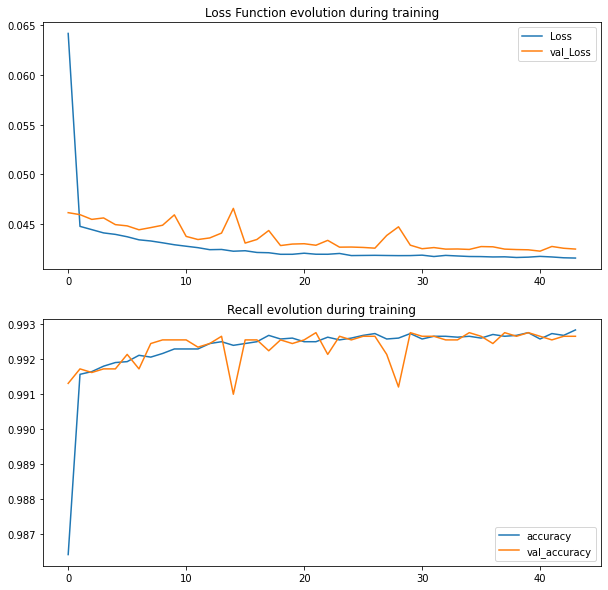

In [85]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Recall evolution during training')
plt.legend()

Train Result:
Accuracy Score: 99.28%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992938    0.950000  0.992827      0.971469      0.992530
recall         0.999869    0.258856  0.992827      0.629362      0.992827
f1-score       0.996392    0.406852  0.992827      0.701622      0.990789
support    38249.000000  367.000000  0.992827  38616.000000  38616.000000
_______________________________________________


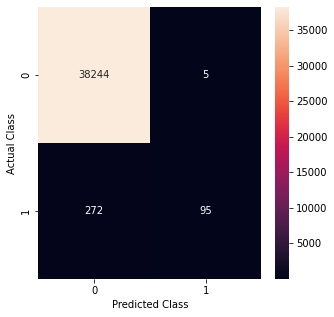

Confusion Matrix: 
 None

Test Result:
Accuracy Score: 99.24%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992396    0.975610  0.992363      0.984003      0.992236
recall         0.999951    0.203046  0.992363      0.601498      0.992363
f1-score       0.996159    0.336134  0.992363      0.666147      0.989874
support    20491.000000  197.000000  0.992363  20688.000000  20688.000000
_______________________________________________


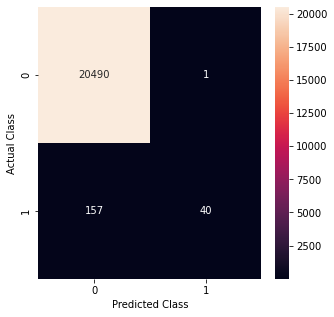

Confusion Matrix: 
 None



In [86]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

In [709]:
nn.build_fn().summary()

Model: "sequential_2110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7249 (Dense)           (None, 89)                1246      
_________________________________________________________________
dense_7250 (Dense)           (None, 89)                8010      
_________________________________________________________________
dense_7251 (Dense)           (None, 89)                8010      
_________________________________________________________________
dense_7252 (Dense)           (None, 89)                8010      
_________________________________________________________________
dense_7253 (Dense)           (None, 1)                 90        
Total params: 25,366
Trainable params: 25,366
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Predictions on the train set

y_train_pred = nn.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 40.69%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     38249
           1       0.95      0.26      0.41       367

    accuracy                           0.99     38616
   macro avg       0.97      0.63      0.70     38616
weighted avg       0.99      0.99      0.99     38616



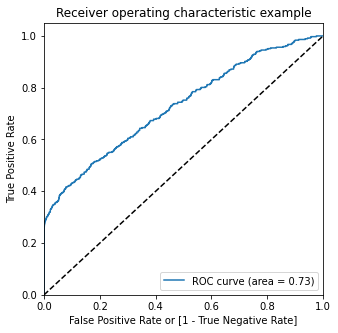

In [91]:
# Predicted probability
y_train_pred_proba_rf = nn.predict_proba(X_train)[:,1]

# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba_rf)

In [92]:
# Predictions on the test set
y_test_pred = nn.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 33.61%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     20491
           1       0.98      0.20      0.34       197

    accuracy                           0.99     20688
   macro avg       0.98      0.60      0.67     20688
weighted avg       0.99      0.99      0.99     20688



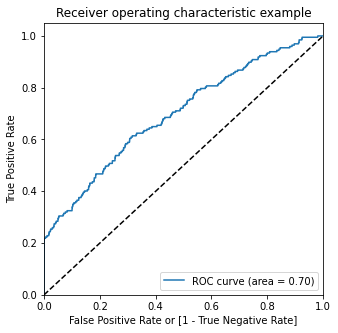

In [93]:
# Predicted probability
y_test_pred_proba = nn.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# LSTM RNN IN PYTHON - AV

In [362]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

In [363]:
df.head()

DATETIME  CUSTOMER_ID  TRASCATION AMOUNT  \
0 2018-09-20 11:49:41            0              88.11   
1 2018-09-20 20:21:57            0              78.25   
2 2018-08-01 12:11:36            0              62.28   
3 2018-08-01 13:58:40            0              80.16   
4 2018-06-19 04:18:11            0              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  Airways  Clothing  Electronics  Food  \
0                           172      0        0         0            0     0   
1                           172      0        0         0            0     0   
2                           122      0        1         0            0     0   
3                           122      0        1         0            0     0   
4                            79      0        0         0            0     0   

   Footwear  Grocery  Hotels  Insulation  Rental Car  Retail        date  
0         0        0       1           0           0       0  2018-09-20  
1         0        1       0           0           0       0  2018-09-20  
2         0        0       0           0           0       0  2018-08-01  
3         0        0       0           0           0       0  2018-08-01  
4         0        0       0           1           0       0  2018-06-19

In [364]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [366]:
df['date'] = df['DATETIME'].dt.date

In [367]:
df_nn = (
                df
#                 .assign(hour = df['DATETIME'].dt.hour)
#                 .assign(day = df['DATETIME'].dt.day)
#                 .assign(month = df['DATETIME'].dt.month)
#                 .assign(day_of_week = df['DATETIME'].dt.dayofweek)
#                 .assign(week_of_year = df['DATETIME'].dt.isocalendar().week)
                .assign(date = df['DATETIME'].dt.date)
              )

In [368]:
# def onehot_encode_pd(df, cols):
#     for col in cols:
#         dummies = pd.get_dummies(df[col], prefix=col)
#         df = pd.concat([df, dummies], axis=1).drop(columns=col)
    
#     return df

# df_nn = onehot_encode_pd(df_nn, ['month','day_of_week'])


In [369]:
df_nn.head()

DATETIME  CUSTOMER_ID  TRASCATION AMOUNT  \
0 2018-09-20 11:49:41            0              88.11   
1 2018-09-20 20:21:57            0              78.25   
2 2018-08-01 12:11:36            0              62.28   
3 2018-08-01 13:58:40            0              80.16   
4 2018-06-19 04:18:11            0              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  Airways  Clothing  Electronics  Food  \
0                           172      0        0         0            0     0   
1                           172      0        0         0            0     0   
2                           122      0        1         0            0     0   
3                           122      0        1         0            0     0   
4                            79      0        0         0            0     0   

   Footwear  Grocery  Hotels  Insulation  Rental Car  Retail        date  
0         0        0       1           0           0       0  2018-09-20  
1         0        1       0           0           0       0  2018-09-20  
2         0        0       0           0           0       0  2018-08-01  
3         0        0       0           0           0       0  2018-08-01  
4         0        0       0           1           0       0  2018-06-19

In [370]:
df_nn = df_nn.set_index('date')

In [371]:
df_nn = df_nn.drop("DATETIME",axis=1)

In [372]:
T = 45
LR = 0.0001
EPOCH = 20
BATCH = 512

In [373]:
df_nn.head()

CUSTOMER_ID  TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  \
date                                                                       
2018-09-20            0              88.11                           172   
2018-09-20            0              78.25                           172   
2018-08-01            0              62.28                           122   
2018-08-01            0              80.16                           122   
2018-06-19            0              90.07                            79   

            FRAUD  Airways  Clothing  Electronics  Food  Footwear  Grocery  \
date                                                                         
2018-09-20      0        0         0            0     0         0        0   
2018-09-20      0        0         0            0     0         0        1   
2018-08-01      0        1         0            0     0         0        0   
2018-08-01      0        1         0            0     0         0        0   
2018-06-19      0        0         0            0     0         0        0   

            Hotels  Insulation  Rental Car  Retail  
date                                                
2018-09-20       1           0           0       0  
2018-09-20       0           0           0       0  
2018-08-01       0           0           0       0  
2018-08-01       0           0           0       0  
2018-06-19       0           1           0       0

In [374]:
X = df_nn.drop('FRAUD', axis=1).sort_index()
y = df_nn.FRAUD.sort_index()

train_features_v, test_features, train_labels_v, test_labels = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42, stratify=y)
train_features, val_features, train_labels, val_labels = train_test_split(train_features_v, train_labels_v, 
                                                            test_size=0.2, random_state=42, stratify=train_labels_v)



prepend_features = train_features.iloc[-(T-1):]
test_features = pd.concat([prepend_features, test_features], axis=0)

prepend_features = val_features.iloc[-(T-1):]
val_features = pd.concat([prepend_features, val_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape, val_features.shape, val_labels.shape

((38616, 13), (38616,), (20732, 13), (20688,), (9698, 13), (9654,))

In [375]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

# The Scaler is fit on the training set and then applied to the test set
scaled_val_features = pd.DataFrame(scaler.transform(val_features.values),
                                    index=val_features.index,
                                    columns=val_features.columns)

scaled_train_features.shape, scaled_test_features.shape , scaled_val_features.shape

((38616, 13), (20732, 13), (9698, 13))

In [376]:
# Create sequences of T timesteps
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')


X_val, y_val = [], []
for i in range(val_labels.shape[0]):
    X_val.append(scaled_val_features.iloc[i:i+T].values)
    y_val.append(val_labels.iloc[i])
X_val, y_val = np.array(X_val), np.array(y_val).reshape(-1,1)  

print(f'Validation data dimensions: {X_val.shape}, {y_val.shape}')

Train data dimensions: (38572, 45, 13), (38572, 1)
Test data dimensions: (20688, 45, 13), (20688, 1)
Validation data dimensions: (9654, 45, 13), (9654, 1)


In [390]:
T = 45
model4 = Sequential()
model4.add(LSTM(units =64, input_shape = (T, X_train.shape[2])))
model4.add(Dense(units=64, activation='tanh')) 
model4.add(Dense(units=1, activation='sigmoid')) 

model4.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 64)                19968     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 65        
Total params: 24,193
Trainable params: 24,193
Non-trainable params: 0
_________________________________________________________________


In [391]:
model4.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=LR))

In [392]:
# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)

In [399]:
# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
history4 = model4.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_val, y_val),
                    shuffle=True,verbose=1,
                    callbacks=[lr_decay, early_stop])

print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)

Epoch 1/20
76/76 [==============================] - 13s 167ms/step - loss: 0.0509 - accuracy: 0.9905 - val_loss: 0.0509 - val_accuracy: 0.9905
Epoch 2/20
76/76 [==============================] - 17s 221ms/step - loss: 0.0505 - accuracy: 0.9905 - val_loss: 0.0505 - val_accuracy: 0.9905
Epoch 3/20
76/76 [==============================] - 16s 207ms/step - loss: 0.0501 - accuracy: 0.9905 - val_loss: 0.0501 - val_accuracy: 0.9905: 0.0501 - accuracy:  - ETA: 0s - loss: 0.0499 - accuracy: 
Epoch 4/20
76/76 [==============================] - 18s 239ms/step - loss: 0.0497 - accuracy: 0.9905 - val_loss: 0.0497 - val_accuracy: 0.9905
Epoch 5/20
76/76 [==============================] - 19s 248ms/step - loss: 0.0492 - accuracy: 0.9905 - val_loss: 0.0493 - val_accuracy: 0.9905
Epoch 6/20
76/76 [==============================] - 17s 228ms/step - loss: 0.0488 - accuracy: 0.9905 - val_loss: 0.0488 - val_accuracy: 0.9905
Epoch 7/20
76/76 [==============================] - 18s 241ms/step - loss: 0.0484 -

In [400]:
# Evaluate the model:
train_loss, train_acc = model4.evaluate(X_train, y_train,
                                       batch_size=512, verbose=0)
test_loss, test_acc = model4.evaluate(X_test, y_test,
                                     batch_size=512, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')


-----------------------------------------------------------------
train accuracy = 99.173%
test accuracy = 99.1299%


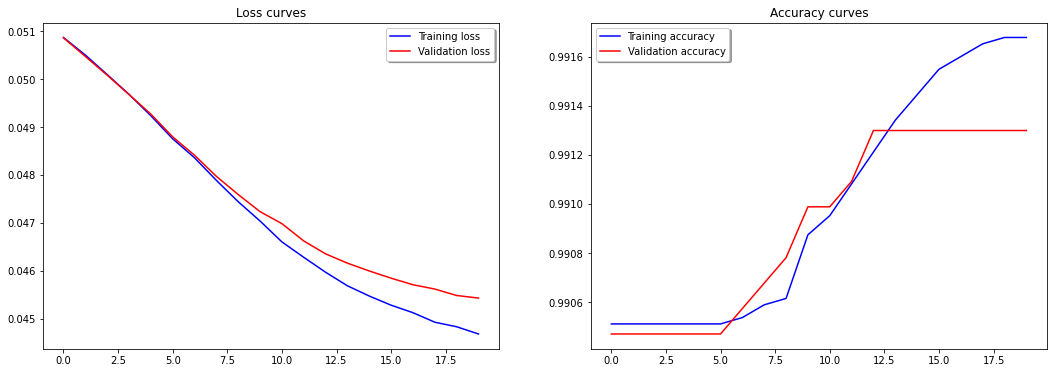

In [401]:
# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(history4.history['loss'], color='b', label='Training loss')
axs[0].plot(history4.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(history4.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(history4.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [402]:
y_test_pred = model4.predict(X_test, batch_size=512, verbose=1)

y_test_pred = y_test_pred.round()

41/41 [==============================] - 2s 54ms/step


In [403]:
np.shape(y_test_pred)

(20688, 1)

Test Result:
Accuracy Score: 99.13%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.991292    1.000000  0.991299      0.995646      0.991375
recall         1.000000    0.086294  0.991299      0.543147      0.991299
f1-score       0.995627    0.158879  0.991299      0.577253      0.987659
support    20491.000000  197.000000  0.991299  20688.000000  20688.000000
_______________________________________________


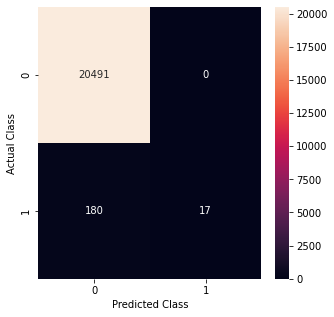

Confusion Matrix: 
 None



In [404]:
print_score(y_test, y_test_pred, train=False)

In [377]:

from tensorflow import keras
print('Tensorflow/Keras: %s' % keras.__version__)
from keras.models import Sequential 
from keras import Input 
from keras.layers import Dense, SimpleRNN 

Tensorflow/Keras: 2.6.0


In [378]:
T = 45

model6 = Sequential()
# model6.add(Input(shape=(time_step,X_train.shape[2]), name='Input-Layer'))
model6.add(SimpleRNN(units=64, activation='tanh', input_shape = (T, X_train.shape[2]))) 
model6.add(Dense(units=64, activation='tanh')) 
model6.add(Dense(units=1, activation='sigmoid')) 


In [379]:
model6.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=LR))
model6.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 64)                4992      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [380]:
# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)

In [381]:
# Train the model. 

start = time()
history6 = model6.fit(X_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.0,
                    validation_data=(X_val, y_val),
                    shuffle=True,verbose=1,
                    callbacks=[lr_decay, early_stop])

print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)

Epoch 1/20
76/76 [==============================] - 9s 94ms/step - loss: 0.6805 - accuracy: 0.5950 - val_loss: 0.6112 - val_accuracy: 0.7050
Epoch 2/20
76/76 [==============================] - 10s 125ms/step - loss: 0.4462 - accuracy: 0.8667 - val_loss: 0.0839 - val_accuracy: 0.9905
Epoch 3/20
76/76 [==============================] - 8s 106ms/step - loss: 0.0547 - accuracy: 0.9904 - val_loss: 0.0511 - val_accuracy: 0.9905
Epoch 4/20
76/76 [==============================] - 9s 114ms/step - loss: 0.0503 - accuracy: 0.9905 - val_loss: 0.0502 - val_accuracy: 0.9905
Epoch 5/20
76/76 [==============================] - 10s 127ms/step - loss: 0.0495 - accuracy: 0.9905 - val_loss: 0.0496 - val_accuracy: 0.9905
Epoch 6/20
76/76 [==============================] - 7s 95ms/step - loss: 0.0489 - accuracy: 0.9906 - val_loss: 0.0490 - val_accuracy: 0.9906
Epoch 7/20
76/76 [==============================] - 11s 144ms/step - loss: 0.0483 - accuracy: 0.9907 - val_loss: 0.0485 - val_accuracy: 0.9906
Epoch

In [382]:
# Evaluate the model:
train_loss, train_acc = model6.evaluate(X_train, y_train,
                                       batch_size=512, verbose=0)
test_loss, test_acc = model6.evaluate(X_test, y_test,
                                     batch_size=512, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')


-----------------------------------------------------------------
train accuracy = 99.1782%
test accuracy = 99.1058%


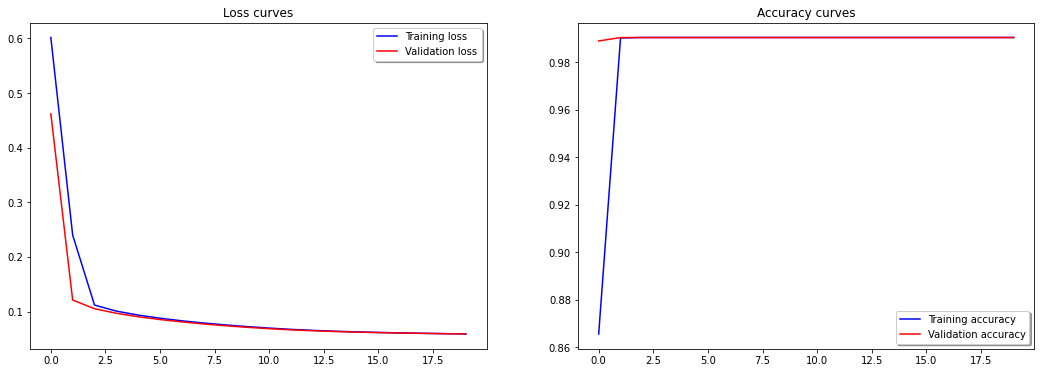

In [383]:
# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(history4.history['loss'], color='b', label='Training loss')
axs[0].plot(history4.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(history4.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(history4.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [384]:
y_test_pred = model6.predict(X_test, batch_size=512, verbose=1)

y_test_pred = y_test_pred.round()



41/41 [==============================] - 1s 16ms/step


In [385]:
np.shape(y_test_pred)

(20688, 1)

Test Result:
Accuracy Score: 99.11%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.991290    0.772727  0.991058      0.882009      0.989209
recall         0.999756    0.086294  0.991058      0.543025      0.991058
f1-score       0.995505    0.155251  0.991058      0.575378      0.987504
support    20491.000000  197.000000  0.991058  20688.000000  20688.000000
_______________________________________________


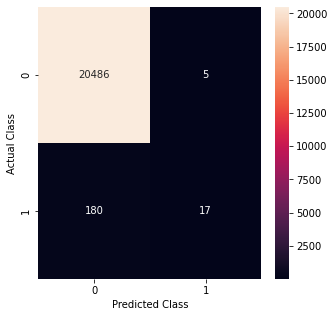

Confusion Matrix: 
 None



In [386]:
print_score(y_test, y_test_pred.round(), train=False)